
Where's shall I live in San Francisco?
==========================

First, let's look at a map. This one is courtesy of [San Francisco Police Department](http://sf-police.org/Modules/ShowDocument.aspx?documentid=27484).


![Map](https://raw.githubusercontent.com/stichbury/Communicating_Data_Science/master/Citywide_District_Map.jpg "Map of Police Departments")

Now let's review the overall police incident reports for each district between 1st June and 31st Aug 2014.



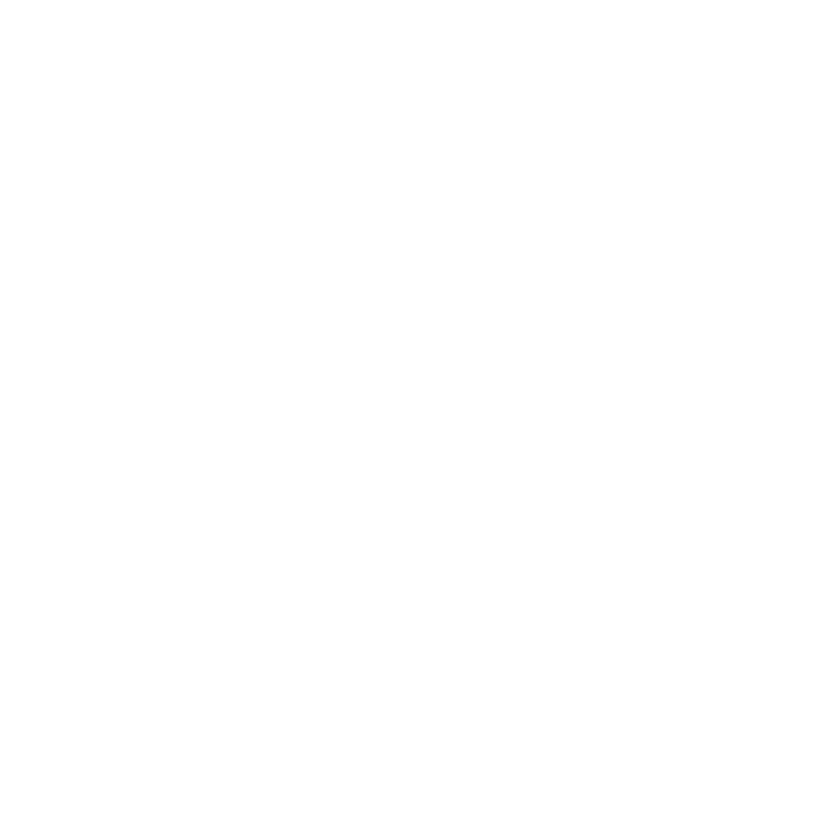

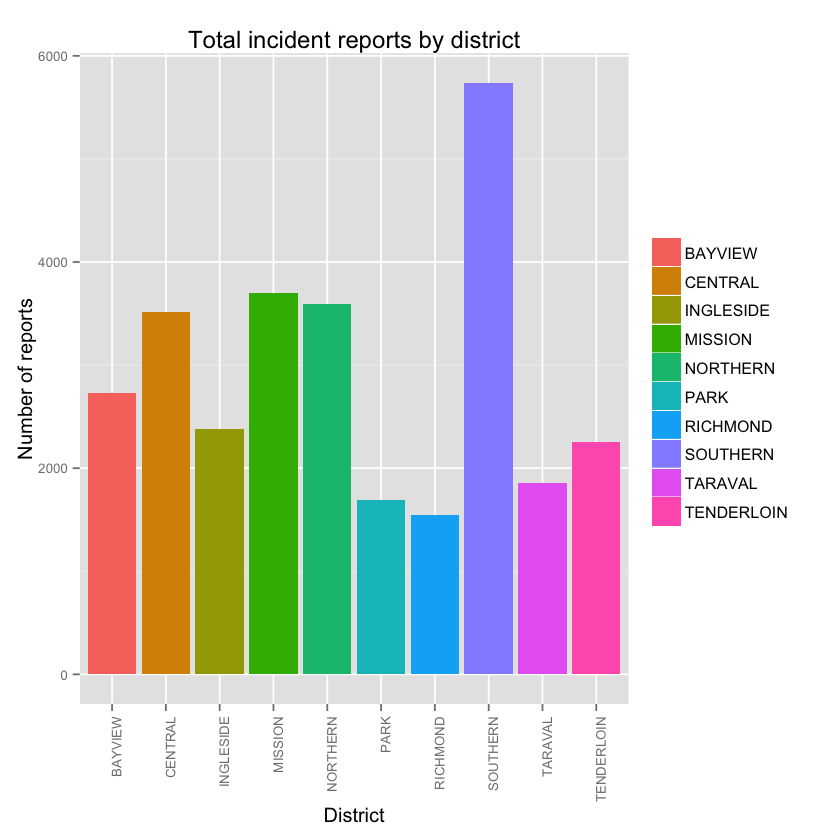

In [5]:
##Show total crime in each of the 10 districts throughout the entire summer
##Drill into the safest district

library(bitops)
library(RCurl)
x <- getURL("https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv")
sf <- read.csv(text = x)

#Calculate incidents reported by district
vec <- tapply(sf$IncidntNum, sf$PdDistrict, length)

#Build a bar plot on screen
plot.new()

library(ggplot2)
g<-qplot(x=names(vec), y=vec, geom="bar", fill=names(vec),stat="identity", main="Total incident reports by district", xlab="District", ylab="Number of reports")

g+theme(axis.text=element_text(size=8),axis.text.x = element_text(angle = 90, hjust = 1),legend.title=element_blank())


It looks as if Richmond is the place with the fewest incident reports. Let's have a look at the relative rates of crime in that district over the same period.

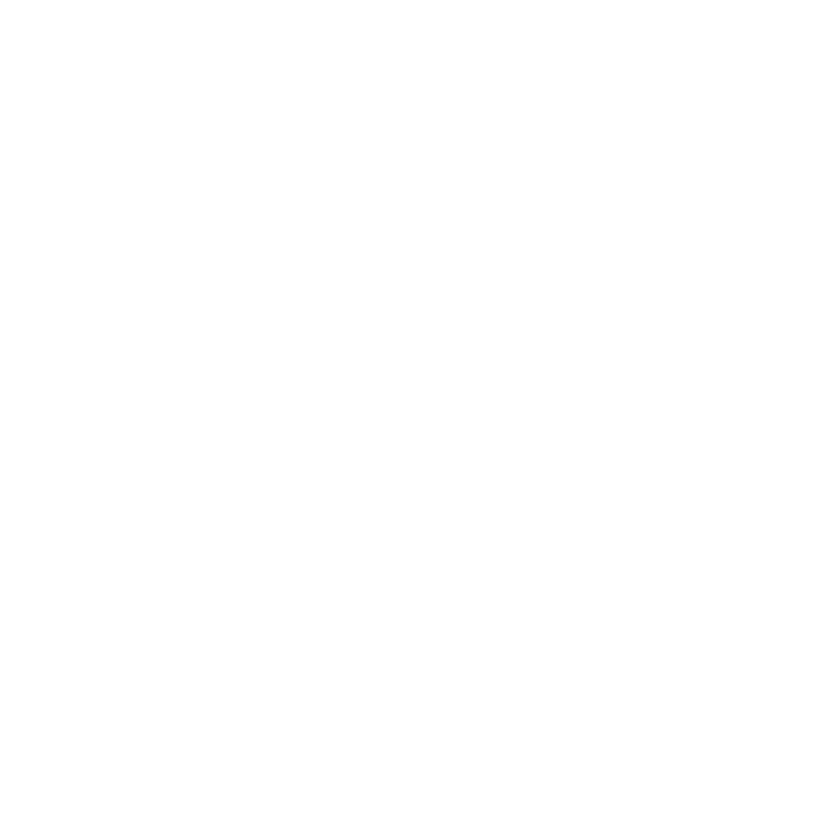

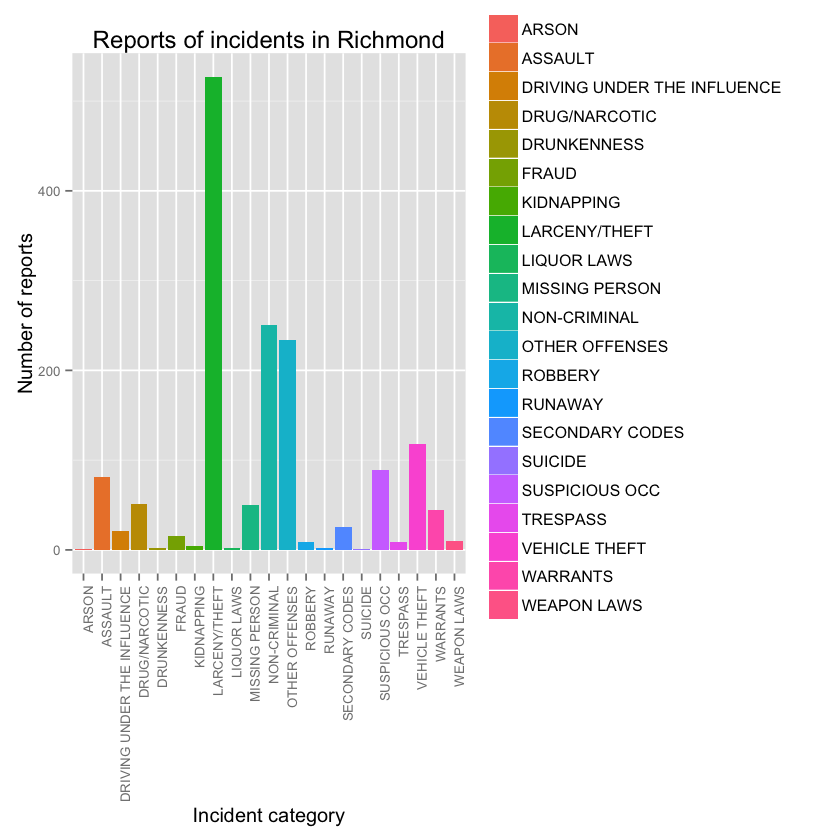

In [7]:
#List incidents in each category in Richmond
#Split by district

districts <- split(sf, sf$PdDistrict)
richmondDat <-aggregate(districts$RICHMOND$Category ~ Category, districts$RICHMOND, length)

plot.new()
h<-qplot(x=richmondDat$Category, y=richmondDat$`districts$RICHMOND$Category`, fill=richmondDat$Category, geom="bar", stat="identity", main="Reports of incidents in Richmond", xlab="Incident category", ylab="Number of reports")

h+theme(axis.text=element_text(size=8),axis.text.x = element_text(angle = 90, hjust = 1),legend.title=element_blank())




OK, Larceny/Theft is the big one there and is making it hard to see the rest of the reports in relative detail. 

Let's pull the top 10 categories of incident reports out, so we can see the bigest problems in Richmond.

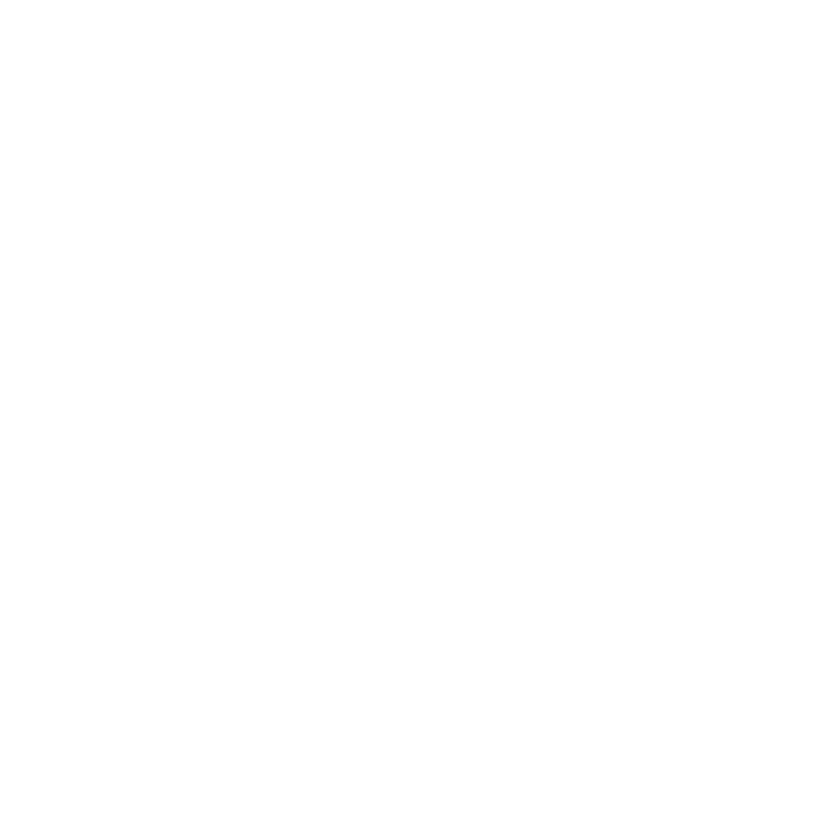

[1] "Total reports = 1546"

             Report Category Number of reports
                       ARSON                 1
                     SUICIDE                 1
                 DRUNKENNESS                 2
                 LIQUOR LAWS                 2
                     RUNAWAY                 2
                  KIDNAPPING                 4
                     ROBBERY                 9
                    TRESPASS                 9
                 WEAPON LAWS                10
                       FRAUD                15
 DRIVING UNDER THE INFLUENCE                21
             SECONDARY CODES                25
                    WARRANTS                45
              MISSING PERSON                50
               DRUG/NARCOTIC                51
                     ASSAULT                81
              SUSPICIOUS OCC                89
               VEHICLE THEFT               118
              OTHER OFFENSES               234
                NON-CRIMINAL               250
             

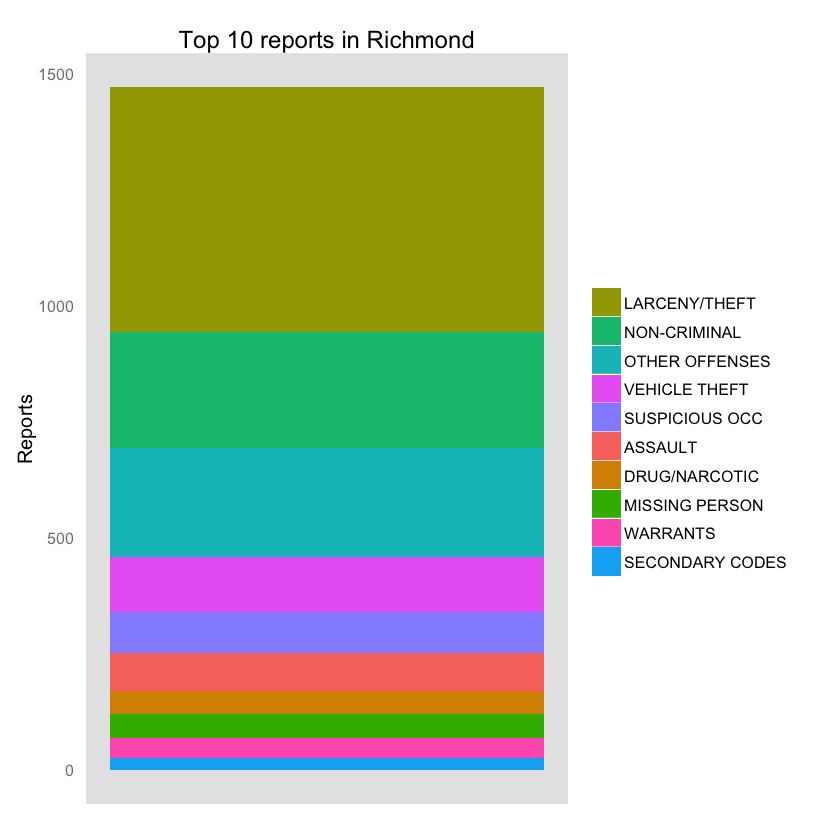

In [11]:
# Show top 10 categories of report in Richmond
orderedDat<-richmondDat[order(richmondDat$`districts$RICHMOND$Category`),]
subsetted<-orderedDat[-c(1:11),]

#Plot as a stacked bar chart
plot.new()
i = ggplot(data=subsetted, aes(x=factor(1), y=subsetted$`districts$RICHMOND$Category`, fill = subsetted$Category)) + geom_bar(stat = "identity") + ylab("Reports")+ ggtitle("Top 10 reports in Richmond")

i=i + scale_fill_discrete(breaks = rev(subsetted$Category)) + theme(axis.text.x=element_blank(),
                                                            
                                                                    axis.ticks=element_blank(),
                                                                    axis.title.x=element_blank(),
                                                            
                                                                    panel.grid.major=element_blank(),
                                                                    panel.grid.minor=element_blank(),
                                                                    plot.background=element_blank(), legend.title=element_blank())

i

colnames(orderedDat)[1] <-"Report Category"
colnames(orderedDat)[2] <-"Number of reports"
sprintf("Total reports = %d", totalreports <- sum(orderedDat$`Number of reports`))
print(orderedDat,row.names = F)


The biggest problem is larceny/theft, which accounts for 527 out of 1546 reports (34%). Reassuringly, the next largest number of reports is non-criminal at (16%).

This is the end of my summary of police department data for San Francisco.  If I'd had more time, I would have plotted the larceny/theft reports by GPS coordinates, so I could establish where to avoid in Richmond, and maybe would have looked at the other districts to see their top crime by percentage.